In [1]:
import pickle
from scipy.cluster.vq import *
import glob
import os

In [2]:
from PCV.clustering import hcluster
from PCV.tools import pca
from PCV.tools import imtools

In [7]:
from PIL import Image
import numpy
from pylab import *

In [8]:
# get list of images

#imlist = glob.glob("image_samples/animal_images/*.jpeg")
path = "image_samples/"
imlist = [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpeg')]

In [9]:
imlist

['image_samples/meme_4.jpeg',
 'image_samples/promo_4.jpeg',
 'image_samples/landscape_wo_4.jpeg',
 'image_samples/animal_3.jpeg',
 'image_samples/selfie_8.jpeg',
 'image_samples/object_5.jpeg',
 'image_samples/art_6.jpeg',
 'image_samples/body_7.jpeg',
 'image_samples/landscape_w_2.jpeg',
 'image_samples/promo_8.jpeg',
 'image_samples/meme_8.jpeg',
 'image_samples/quote_3.jpeg',
 'image_samples/selfie_4.jpeg',
 'image_samples/object_9.jpeg',
 'image_samples/building_6.jpeg',
 'image_samples/candid_3.jpeg',
 'image_samples/urban_w_5.jpeg',
 'image_samples/food_6.jpeg',
 'image_samples/food_7.jpeg',
 'image_samples/urban_w_4.jpeg',
 'image_samples/candid_2.jpeg',
 'image_samples/body_10.jpeg',
 'image_samples/building_7.jpeg',
 'image_samples/object_8.jpeg',
 'image_samples/selfie_5.jpeg',
 'image_samples/meme_9.jpeg',
 'image_samples/quote_2.jpeg',
 'image_samples/promo_9.jpeg',
 'image_samples/landscape_w_3.jpeg',
 'image_samples/group_10.jpeg',
 'image_samples/body_6.jpeg',
 'image_s

In [10]:
# extract feature vector (8 bins per color channel)
features = numpy.zeros([len(imlist), 512])
for i,f in enumerate(imlist):
    im = array(Image.open(f))
    
    # multi-dimensional histogram
    h,edges = histogramdd(im.reshape(-1,3),8,normed=True,range=[(0,255),(0,255),(0,255)])
    features[i] = h.flatten()

tree = hcluster.hcluster(features)

In [11]:
hcluster.draw_dendrogram(tree,imlist,filename='image_sample_tree.pdf')

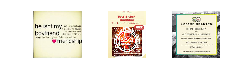

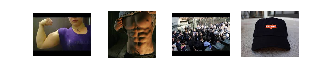

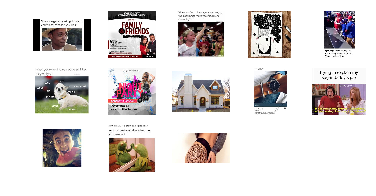

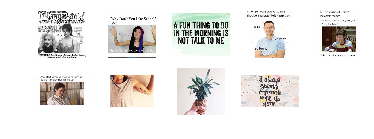

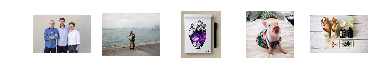

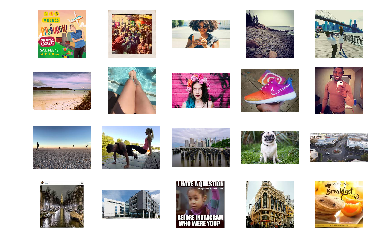

In [18]:
# visualize clusters with some (arbitrary) threshold
clusters = tree.extract_clusters(0.25*tree.distance)

# plot images for clusters with more than 3 elements
for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>2:
        figure()
        for p in range(minimum(nbr_elements,20)):
            subplot(4,5,p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()